In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
seed=1000
np.random.seed(seed)

In [3]:
with open('input_data/DATA.pkl','rb') as file:
    data=pickle.load(file)
data

RDKit WARNING: [02:49:24] Enabling RDKit 2019.09.3 jupyter extensions


,Exp id,External Donor,External Donor (PubChem CID),External Donor (CAS Registry Number),Donor/AlEt3 (External Donor (Properties),Activity (Kg/g Cat.h),sdf_file_name,rdkit_mol,MaxEStateIndex_2d_rdkit,MinEStateIndex_2d_rdkit,...,NumAromaticRings_2d_rdkit,NumHAcceptors_2d_rdkit,NumHeteroatoms_2d_rdkit,NumRotatableBonds_2d_rdkit,RingCount_2d_rdkit,MolLogP_2d_rdkit,MolMR_2d_rdkit,fr_allylic_oxid_2d_rdkit,fr_benzene_2d_rdkit,fr_unbrch_alkane_2d_rdkit
0,1,Dimethyldiethoxysilane (DMDES),62322,78-62-6,0.200,5.1,Dimethyldiethoxysilane_(DMDES)_62322,<rdkit.Chem.rdchem.Mol object at 0x7f37cc314370>,5.386389,-1.703318,...,0,2,3,4,0,1.7612,40.734,0,0,0
1,2,Dimethyldiethoxysilane (DMDES),62322,78-62-7,0.100,9.2,Dimethyldiethoxysilane_(DMDES)_62322,<rdkit.Chem.rdchem.Mol object at 0x7f3757efde30>,5.386389,-1.703318,...,0,2,3,4,0,1.7612,40.734,0,0,0
2,3,Dimethyldiethoxysilane (DMDES),62322,78-62-8,0.050,8.7,Dimethyldiethoxysilane_(DMDES)_62322,<rdkit.Chem.rdchem.Mol object at 0x7f3757ef50f0>,5.386389,-1.703318,...,0,2,3,4,0,1.7612,40.734,0,0,0
3,4,Dimethyldiisopropenoxysilane (DMDIPS),10942923,63746-11-2,0.200,6.5,Dimethyldiisopropenoxysilane_(DMDIPS)_10942923,<rdkit.Chem.rdchem.Mol object at 0x7f375447cfb0>,5.409861,-2.028549,...,0,2,3,4,0,2.7886,49.280,2,0,0
4,5,Dimethyldiisopropenoxysilane (DMDIPS),10942923,63746-11-3,0.100,4.5,Dimethyldiisopropenoxysilane_(DMDIPS)_10942923,<rdkit.Chem.rdchem.Mol object at 0x7f37544949b0>,5.409861,-2.028549,...,0,2,3,4,0,2.7886,49.280,2,0,0
5,6,Dimethyldiisopropenoxysilane (DMDIPS),10942923,63746-11-4,0.050,8.7,Dimethyldiisopropenoxysilane_(DMDIPS)_10942923,<rdkit.Chem.rdchem.Mol object at 0x7f3754494cf0>,5.409861,-2.028549,...,0,2,3,4,0,2.7886,49.280,2,0,0
6,7,Diphenyldimethoxysilane (DPDMS),81284,6843-66-9,0.200,7.6,Diphenyldimethoxysilane_(DPDMS)_81284,<rdkit.Chem.rdchem.Mol object at 0x7f3754494f70>,5.775880,-2.495648,...,2,2,3,4,2,1.5358,71.924,0,2,0
7,8,Diphenyldimethoxysilane (DPDMS),81284,6843-66-10,0.100,8.0,Diphenyldimethoxysilane_(DPDMS)_81284,<rdkit.Chem.rdchem.Mol object at 0x7f375449a230>,5.775880,-2.495648,...,2,2,3,4,2,1.5358,71.924,0,2,0
8,9,Diphenyldimethoxysilane (DPDMS),81284,6843-66-11,0.050,11.4,Diphenyldimethoxysilane_(DPDMS)_81284,<rdkit.Chem.rdchem.Mol object at 0x7f375449a4b0>,5.775880,-2.495648,...,2,2,3,4,2,1.5358,71.924,0,2,0
9,10,Diphenylsilane (DPS),6327659,775-12-2,0.200,10.8,Diphenylsilane_(DPS)_6327659,<rdkit.Chem.rdchem.Mol object at 0x7f375449a730>,2.172068,0.776728,...,2,0,1,2,2,1.3416,57.906,0,2,0


# Preprocessing

In [4]:
X=data.copy()
drop_cols=['External Donor (PubChem CID)','External Donor (CAS Registry Number)','Activity (Kg/g Cat.h)','sdf_file_name','rdkit_mol']
X=X.drop(columns=drop_cols)
y=data['Activity (Kg/g Cat.h)']
print(X.shape,y.shape)
X

(60, 92) (60,)


,Exp id,External Donor,Donor/AlEt3 (External Donor (Properties),MaxEStateIndex_2d_rdkit,MinEStateIndex_2d_rdkit,MaxAbsEStateIndex_2d_rdkit,MinAbsEStateIndex_2d_rdkit,qed_2d_rdkit,MolWt_2d_rdkit,HeavyAtomMolWt_2d_rdkit,...,NumAromaticRings_2d_rdkit,NumHAcceptors_2d_rdkit,NumHeteroatoms_2d_rdkit,NumRotatableBonds_2d_rdkit,RingCount_2d_rdkit,MolLogP_2d_rdkit,MolMR_2d_rdkit,fr_allylic_oxid_2d_rdkit,fr_benzene_2d_rdkit,fr_unbrch_alkane_2d_rdkit
0,1,Dimethyldiethoxysilane (DMDES),0.200,5.386389,-1.703318,5.386389,0.763117,0.565569,148.278,132.150,...,0,2,3,4,0,1.7612,40.734,0,0,0
1,2,Dimethyldiethoxysilane (DMDES),0.100,5.386389,-1.703318,5.386389,0.763117,0.565569,148.278,132.150,...,0,2,3,4,0,1.7612,40.734,0,0,0
2,3,Dimethyldiethoxysilane (DMDES),0.050,5.386389,-1.703318,5.386389,0.763117,0.565569,148.278,132.150,...,0,2,3,4,0,1.7612,40.734,0,0,0
3,4,Dimethyldiisopropenoxysilane (DMDIPS),0.200,5.409861,-2.028549,5.409861,0.697145,0.479330,172.300,156.172,...,0,2,3,4,0,2.7886,49.280,2,0,0
4,5,Dimethyldiisopropenoxysilane (DMDIPS),0.100,5.409861,-2.028549,5.409861,0.697145,0.479330,172.300,156.172,...,0,2,3,4,0,2.7886,49.280,2,0,0
5,6,Dimethyldiisopropenoxysilane (DMDIPS),0.050,5.409861,-2.028549,5.409861,0.697145,0.479330,172.300,156.172,...,0,2,3,4,0,2.7886,49.280,2,0,0
6,7,Diphenyldimethoxysilane (DPDMS),0.200,5.775880,-2.495648,5.775880,1.121481,0.759569,244.366,228.238,...,2,2,3,4,2,1.5358,71.924,0,2,0
7,8,Diphenyldimethoxysilane (DPDMS),0.100,5.775880,-2.495648,5.775880,1.121481,0.759569,244.366,228.238,...,2,2,3,4,2,1.5358,71.924,0,2,0
8,9,Diphenyldimethoxysilane (DPDMS),0.050,5.775880,-2.495648,5.775880,1.121481,0.759569,244.366,228.238,...,2,2,3,4,2,1.5358,71.924,0,2,0
9,10,Diphenylsilane (DPS),0.200,2.172068,0.776728,2.172068,0.776728,0.614904,182.298,172.218,...,2,0,1,2,2,1.3416,57.906,0,2,0


In [5]:
X_whole=X.copy()
y_whole=y.copy()

In [6]:
category_cols=['External Donor']
category_keywords=['Num','Count','fr']
for col in X.columns:
    for keyword in category_keywords:
        if keyword in col:
            category_cols.append(col)
            break
category_cols

['External Donor',
 'NumValenceElectrons_2d_rdkit',
 'NumRadicalElectrons_2d_rdkit',
 'HeavyAtomCount_2d_rdkit',
 'NOCount_2d_rdkit',
 'NumAromaticCarbocycles_2d_rdkit',
 'NumAromaticRings_2d_rdkit',
 'NumHAcceptors_2d_rdkit',
 'NumHeteroatoms_2d_rdkit',
 'NumRotatableBonds_2d_rdkit',
 'RingCount_2d_rdkit',
 'fr_allylic_oxid_2d_rdkit',
 'fr_benzene_2d_rdkit',
 'fr_unbrch_alkane_2d_rdkit']

# Training

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from tqdm import tqdm

lr = LinearRegression()
rf = RandomForestRegressor(max_depth=10)
svr = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=0.1)
mlp= MLPRegressor(hidden_layer_sizes=(10,10,5,5,2), max_iter=2000)
model_dict={'linear_reg':lr,'random_forest':rf,'SVR':svr,'neural_net':mlp}

out_data={'train_size':[],'model_name':[],'data_set':[],'r2':[],'mse':[],'mae':[]}
total_data_size=X.shape[0]
for train_size in tqdm(range(1,total_data_size+1)):
    #split
    if train_size < total_data_size:
        X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=train_size,random_state=seed)
    elif train_size==total_data_size:
        X_train=X_test=X
        y_train=y_test=y
    X_train_std=X_train.copy()
    X_test_std=X_test.copy()
    X_whole_std=X_whole.copy()
    
    #preprocessing
    X_train_std=X_train_std.drop(columns=['Exp id'])
    X_test_std=X_test_std.drop(columns=['Exp id'])
    X_whole_std=X_whole_std.drop(columns=['Exp id'])
    
    o_enc = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)
    o_enc=o_enc.fit(X_train_std['External Donor'].values.reshape(-1,1))
    X_train_std['External Donor']=o_enc.transform(X_train_std['External Donor'].values.reshape(-1,1))
    X_test_std['External Donor']=o_enc.transform(X_test_std['External Donor'].values.reshape(-1,1))
    X_whole_std['External Donor']=o_enc.transform(X_whole_std['External Donor'].values.reshape(-1,1))
    
    for col in X_train_std.columns:
        if col in category_cols:
            continue
        else:
            scaler=StandardScaler().fit(X_train[col].values.reshape(-1,1))
            X_train_std[col]=scaler.transform(X_train[col].values.reshape(-1,1))
            X_test_std[col]=scaler.transform(X_test[col].values.reshape(-1,1))
            X_whole_std[col]=scaler.transform(X_whole_std[col].values.reshape(-1,1))

    #train and predict
    for model_name,model in model_dict.items():
        model=model.fit(X_train_std,y_train)

        y_pred_train=model.predict(X_train_std)
        y_pred_test=model.predict(X_test_std)
        y_pred_whole=model.predict(X_whole_std)
        
        r2_train=r2_score(y_train,y_pred_train)
        r2_test=r2_score(y_test,y_pred_test)
        r2_whole=r2_score(y_whole,y_pred_whole)
        
        mse_train=mean_squared_error(y_train,y_pred_train)
        mse_test=mean_squared_error(y_test,y_pred_test)
        mse_whole=mean_squared_error(y_whole,y_pred_whole)
        
        mae_train=mean_absolute_error(y_train,y_pred_train)
        mae_test=mean_absolute_error(y_test,y_pred_test)
        mae_whole=mean_absolute_error(y_whole,y_pred_whole)
        
        out_data['train_size'].append(train_size)
        out_data['model_name'].append(model_name)
        out_data['data_set'].append('train')
        out_data['r2'].append(r2_train)
        out_data['mse'].append(mse_train)
        out_data['mae'].append(mae_train)
        
        out_data['train_size'].append(train_size)
        out_data['model_name'].append(model_name)
        out_data['data_set'].append('test')
        out_data['r2'].append(r2_test)
        out_data['mse'].append(mse_test)
        out_data['mae'].append(mae_test)
        
        out_data['train_size'].append(train_size)
        out_data['model_name'].append(model_name)
        out_data['data_set'].append('whole')
        out_data['r2'].append(r2_whole)
        out_data['mse'].append(mse_whole)
        out_data['mae'].append(mae_whole)
        
# plot num_training_samples Vs. metrics (on whole, train, test data)

  0%|          | 0/60 [00:00<?, ?it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
  2%|▏         | 1/60 [00:00<00:24,  2.38it/s]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/neural

 95%|█████████▌| 57/60 [01:30<00:05,  1.73s/it]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
 97%|█████████▋| 58/60 [01:32<00:03,  1.80s/it]/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home

In [8]:
pred_df=pd.DataFrame.from_dict(out_data)
pred_df

,train_size,model_name,data_set,r2,mse,mae
0,1,linear_reg,train,NaN,0.000000e+00,0.000000e+00
1,1,linear_reg,test,-1.524306,1.759237e+01,3.547458e+00
2,1,linear_reg,whole,-1.461764,1.729917e+01,3.488333e+00
3,1,random_forest,train,NaN,6.389773e-29,7.993606e-15
4,1,random_forest,test,-1.524306,1.759237e+01,3.547458e+00
...,...,...,...,...,...,...
715,60,SVR,test,0.793724,1.449529e+00,7.610343e-01
716,60,SVR,whole,0.793724,1.449529e+00,7.610343e-01
717,60,neural_net,train,0.935445,4.536340e-01,4.620343e-01
718,60,neural_net,test,0.935445,4.536340e-01,4.620343e-01


## Save Predictions

In [9]:
import pickle
with open('output/predictions_df.pkl','wb') as file:
    pickle.dump(pred_df,file)

# Plots

In [10]:
y_mean=np.mean(y)
y_mean_array=y_mean*np.ones(len(y))
mse_th=mean_squared_error(y,y_mean_array)
mae_th=mean_absolute_error(y,y_mean_array)
th_dict={'r2':[-0.2,1],'mse':[0,mse_th],'mae':[0,mae_th]}
th_dict

{'r2': [-0.2, 1], 'mse': [0, 7.027141666666666], 'mae': [0, 2.181833333333334]}

In [11]:
def plot(df,data_set=''):
    color_list=["#7aa0c4","#ca82e1" ,"#8bcd50","#e18882"]
    for metric in ['r2','mse','mae']:
        fig,axes=plt.subplots(2,2,sharex=True,sharey=False)
        axes=axes.flatten()
        for idx,model_name in enumerate(model_dict):
            plot_df=df[(df['model_name']==model_name)&(df['data_set']==data_set)]
            axes[idx].plot(plot_df['train_size'],plot_df[metric],c=color_list[idx],label=model_name)
            axes[idx].grid()
        ax=fig.add_subplot(111, frameon=False)
        plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
        plt.xlabel("No. of Training Samples")
        plt.ylabel(metric.upper())
        plt.title(f'{metric.upper()} ({data_set.upper()})',pad=20)
        fig.legend(loc='upper right', bbox_to_anchor=(1.175, 0.84),fontsize=8)   
        plt.tight_layout()
        plt.savefig(f'output/{data_set}_{metric}_vs_num_training_samples.jpg',dpi=300,bbox_inches='tight')

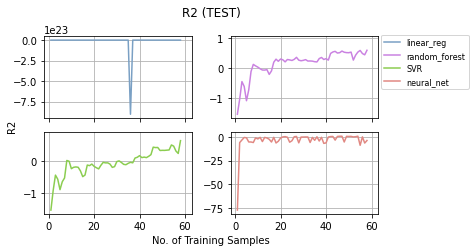

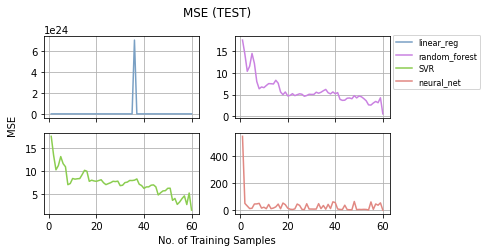

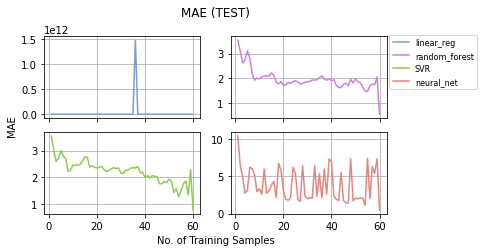

In [12]:
plot(pred_df,'test')

## Tables

In [26]:
df=pred_df[pred_df['data_set']=='test']
df=df.dropna()
df['r2']=df['r2'].clip(0,1)
gb=df.groupby('model_name').mean().sort_values('mse')
gb=gb.drop(columns=['train_size'])
gb.to_csv('output/avg_model_performance.csv',index=False)
gb

,r2,mse,mae
model_name,,,
random_forest,0.276360,5.910683e+00,1.961434e+00
SVR,0.122395,7.445792e+00,2.207162e+00
neural_net,0.109655,3.168534e+01,3.763310e+00
linear_reg,0.132829,1.188240e+23,2.498911e+10


In [28]:
_df=df.sort_values('mse')[:10]
_df.to_csv('output/top_10_models.csv',index=False)
_df

,train_size,model_name,data_set,r2,mse,mae
718,60,neural_net,test,0.935445,0.453634,0.462034
712,60,random_forest,test,0.924815,0.528335,0.544868
715,60,SVR,test,0.793724,1.449529,0.761034
709,60,linear_reg,test,0.744670,1.794242,1.112370
646,54,neural_net,test,0.672861,1.809806,1.091638
685,58,linear_reg,test,0.669478,2.499570,1.187500
652,55,random_forest,test,0.583429,2.560078,1.468000
640,54,random_forest,test,0.529025,2.605540,1.491000
691,58,SVR,test,0.647701,2.664264,1.326595
643,54,SVR,test,0.512248,2.698350,1.259108


## 20 Alkoxysilane plots

In [15]:
train_size=58
model_name='neural_net'

#split
if train_size < total_data_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=train_size,random_state=seed)
elif train_size==total_data_size:
    X_train=X_test=X
    y_train=y_test=y
X_train_std=X_train.copy()
X_test_std=X_test.copy()
X_whole_std=X_whole.copy()
    
#preprocessing
X_train_std=X_train_std.drop(columns=['Exp id'])
X_test_std=X_test_std.drop(columns=['Exp id'])
X_whole_std=X_whole_std.drop(columns=['Exp id'])

o_enc = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)
o_enc=o_enc.fit(X_train_std['External Donor'].values.reshape(-1,1))
X_train_std['External Donor']=o_enc.transform(X_train_std['External Donor'].values.reshape(-1,1))
X_test_std['External Donor']=o_enc.transform(X_test_std['External Donor'].values.reshape(-1,1))
X_whole_std['External Donor']=o_enc.transform(X_whole_std['External Donor'].values.reshape(-1,1))

print(X_train_std.shape)
for col in X_train_std.columns:
    if col in category_cols:
        continue
    else:
        scaler=StandardScaler().fit(X_train[col].values.reshape(-1,1))
        X_train_std[col]=scaler.transform(X_train[col].values.reshape(-1,1))
        X_test_std[col]=scaler.transform(X_test[col].values.reshape(-1,1))
        X_whole_std[col]=scaler.transform(X_whole_std[col].values.reshape(-1,1))

model=model_dict[model_name].fit(X_train_std,y_train)

y_pred_train=model.predict(X_train_std)
y_pred_test=model.predict(X_test_std)
y_pred_whole=model.predict(X_whole_std)

r2_train=r2_score(y_train,y_pred_train)
r2_test=r2_score(y_test,y_pred_test)
r2_whole=r2_score(y_whole,y_pred_whole)

mse_train=mean_squared_error(y_train,y_pred_train)
mse_test=mean_squared_error(y_test,y_pred_test)
mse_whole=mean_squared_error(y_whole,y_pred_whole)

mae_train=mean_absolute_error(y_train,y_pred_train)
mae_test=mean_absolute_error(y_test,y_pred_test)
mae_whole=mean_absolute_error(y_whole,y_pred_whole)

(58, 91)


/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [16]:
print(r2_test,mse_test,mae_test)

0.8935737534789452 0.8048484893154768 0.7826127971272605


In [17]:
plot_df=X_whole.copy()
plot_df['y_true']=y_whole
plot_df['y_pred']=y_pred_whole
plot_df

,Exp id,External Donor,Donor/AlEt3 (External Donor (Properties),MaxEStateIndex_2d_rdkit,MinEStateIndex_2d_rdkit,MaxAbsEStateIndex_2d_rdkit,MinAbsEStateIndex_2d_rdkit,qed_2d_rdkit,MolWt_2d_rdkit,HeavyAtomMolWt_2d_rdkit,...,NumHeteroatoms_2d_rdkit,NumRotatableBonds_2d_rdkit,RingCount_2d_rdkit,MolLogP_2d_rdkit,MolMR_2d_rdkit,fr_allylic_oxid_2d_rdkit,fr_benzene_2d_rdkit,fr_unbrch_alkane_2d_rdkit,y_true,y_pred
0,1,Dimethyldiethoxysilane (DMDES),0.200,5.386389,-1.703318,5.386389,0.763117,0.565569,148.278,132.150,...,3,4,0,1.7612,40.734,0,0,0,5.1,5.007840
1,2,Dimethyldiethoxysilane (DMDES),0.100,5.386389,-1.703318,5.386389,0.763117,0.565569,148.278,132.150,...,3,4,0,1.7612,40.734,0,0,0,9.2,8.851258
2,3,Dimethyldiethoxysilane (DMDES),0.050,5.386389,-1.703318,5.386389,0.763117,0.565569,148.278,132.150,...,3,4,0,1.7612,40.734,0,0,0,8.7,9.299162
3,4,Dimethyldiisopropenoxysilane (DMDIPS),0.200,5.409861,-2.028549,5.409861,0.697145,0.479330,172.300,156.172,...,3,4,0,2.7886,49.280,2,0,0,6.5,6.156212
4,5,Dimethyldiisopropenoxysilane (DMDIPS),0.100,5.409861,-2.028549,5.409861,0.697145,0.479330,172.300,156.172,...,3,4,0,2.7886,49.280,2,0,0,4.5,6.687162
5,6,Dimethyldiisopropenoxysilane (DMDIPS),0.050,5.409861,-2.028549,5.409861,0.697145,0.479330,172.300,156.172,...,3,4,0,2.7886,49.280,2,0,0,8.7,6.919616
6,7,Diphenyldimethoxysilane (DPDMS),0.200,5.775880,-2.495648,5.775880,1.121481,0.759569,244.366,228.238,...,3,4,2,1.5358,71.924,0,2,0,7.6,7.411590
7,8,Diphenyldimethoxysilane (DPDMS),0.100,5.775880,-2.495648,5.775880,1.121481,0.759569,244.366,228.238,...,3,4,2,1.5358,71.924,0,2,0,8.0,9.304997
8,9,Diphenyldimethoxysilane (DPDMS),0.050,5.775880,-2.495648,5.775880,1.121481,0.759569,244.366,228.238,...,3,4,2,1.5358,71.924,0,2,0,11.4,10.267810
9,10,Diphenylsilane (DPS),0.200,2.172068,0.776728,2.172068,0.776728,0.614904,182.298,172.218,...,1,2,2,1.3416,57.906,0,2,0,10.8,9.514474


In [18]:
ext_donor_list=plot_df['External Donor'].unique()
len(ext_donor_list)

19

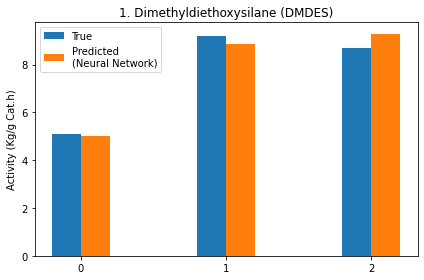

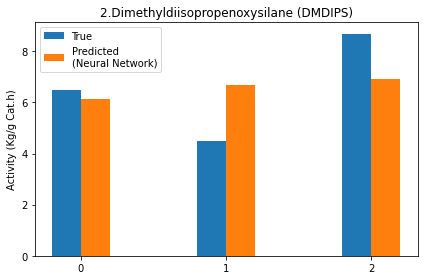

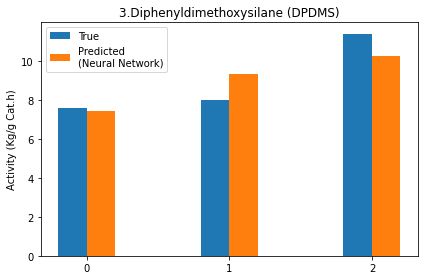

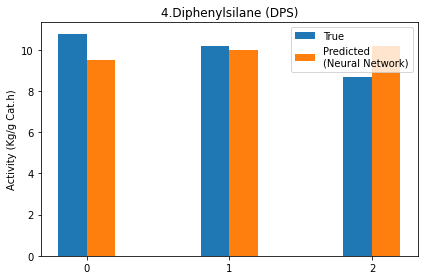

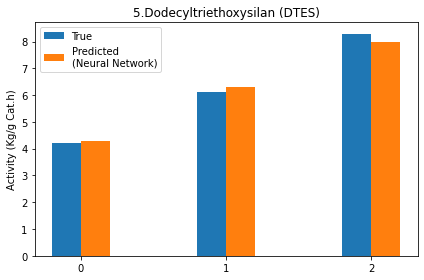

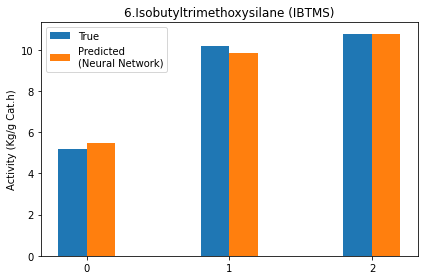

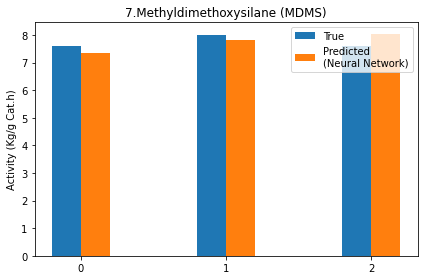

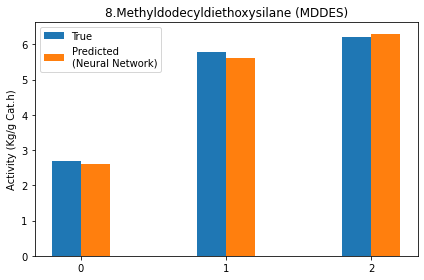

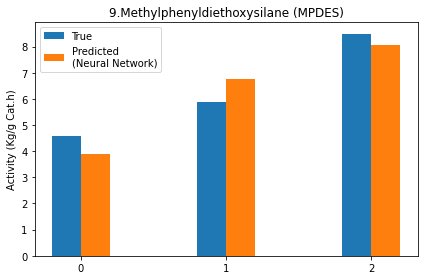

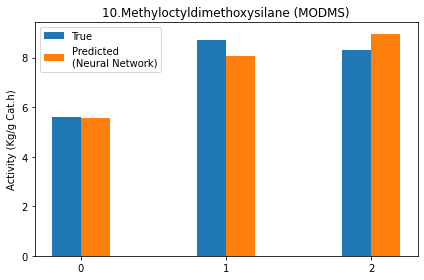

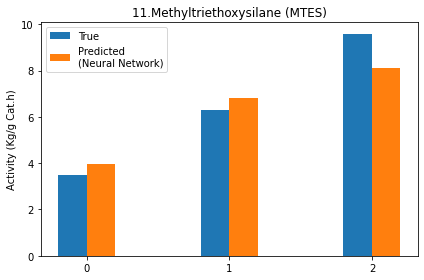

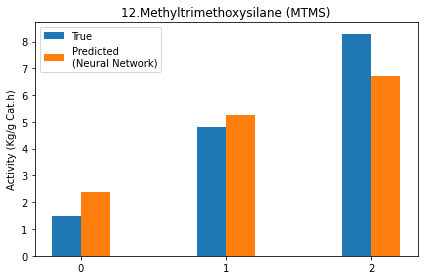

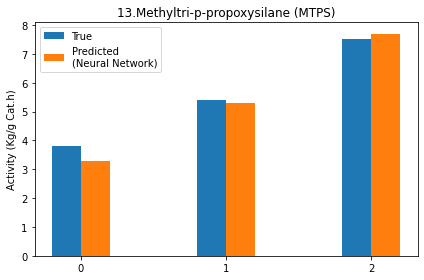

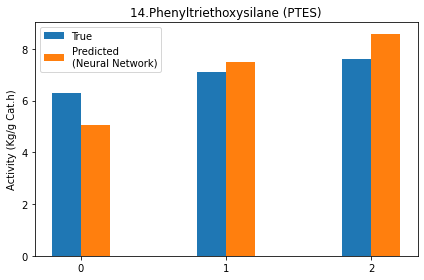

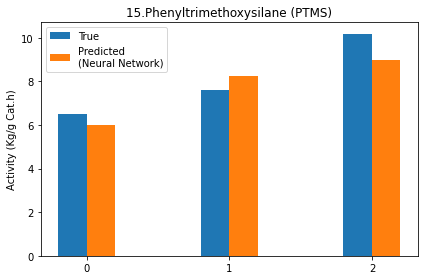

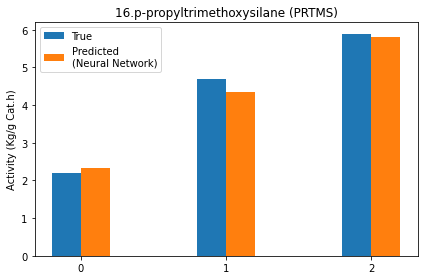

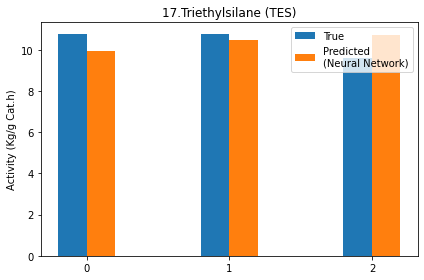

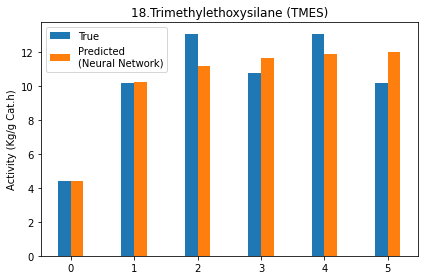

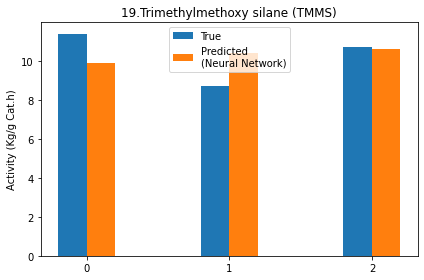

In [24]:
for idx,ext_donor in enumerate(ext_donor_list):
    df=plot_df[plot_df['External Donor']==ext_donor]
    
    width=0.2
    alpha=1
    
    plt.figure()
    plt.bar(np.arange(df['Exp id'].shape[0])-width/2,df['y_true'],label='True',alpha=alpha,width=width)
    plt.bar(np.arange(df['Exp id'].shape[0])+width/2,df['y_pred'],label='Predicted\n(Neural Network)',alpha=alpha,width=width)
    plt.bar(np.arange(df['Exp id'].shape[0]),df['y_true'],width=0,alpha=0)
    title=f'{idx+1}.{ext_donor}'
    plt.title(title)
    plt.ylabel('Activity (Kg/g Cat.h)')
    plt.xticks(np.arange(df['Exp id'].shape[0]))
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'output/{title}.jpg',dpi=300)